- Docs: https://docs.quandl.com/docs/time-series-2
- Data source: https://www.quandl.com/data/BCHARTS-Bitcoin-Charts-Exchange-Rate-Data

In [1]:
import quandl
import config
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
quandl.ApiConfig.api_key = config.QUANDL_API_KEY
coincheck = quandl.get('BCHARTS/COINCHECKJPY')

In [3]:
def rename_columns(df, prefix):
    df.columns = list(map(lambda c: prefix + '_' + c.lower(), df.columns))

In [4]:
rename_columns(coincheck, 'cc')

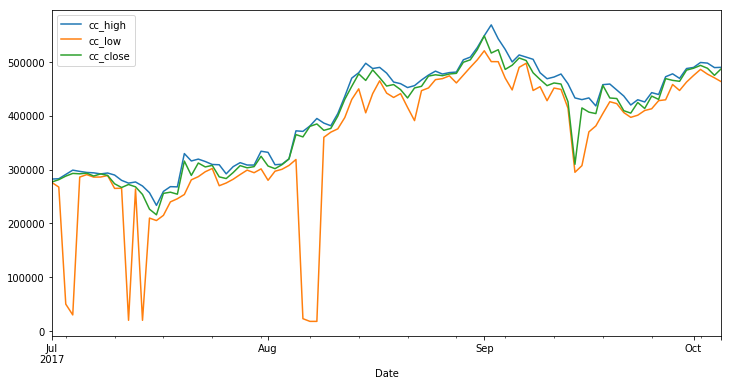

In [5]:
coincheck.loc['2017-7':, ['cc_high', 'cc_low', 'cc_close']].plot.line(figsize=(12,6));

In [6]:
zaif = quandl.get('BCHARTS/BITFLYERJPY')

In [7]:
rename_columns(zaif, 'z')

In [8]:
zaif.head()

,z_open,z_high,z_low,z_close,z_volume (btc),z_volume (currency),z_weighted price
Date,,,,,,,
2017-07-04,296127.0,297040.0,287072.0,292501.0,6401.074934,1.871426e+09,292361.158980
2017-07-05,292501.0,295800.0,286220.0,292127.0,9259.951734,2.689074e+09,290398.258242
2017-07-06,292252.0,294710.0,290650.0,293850.0,7480.300642,2.193006e+09,293170.790282
2017-07-07,293900.0,294350.0,285432.0,288084.0,8908.556721,2.580603e+09,289676.853149
2017-07-08,288121.0,291988.0,285693.0,291821.0,5627.900641,1.625559e+09,288839.290828


In [9]:
df = pd.concat([coincheck, zaif], axis=1, join='inner')

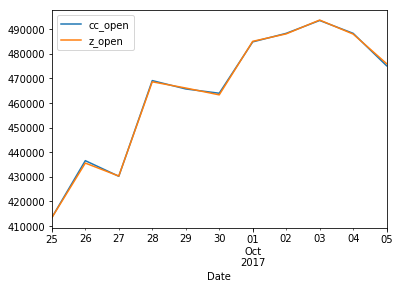

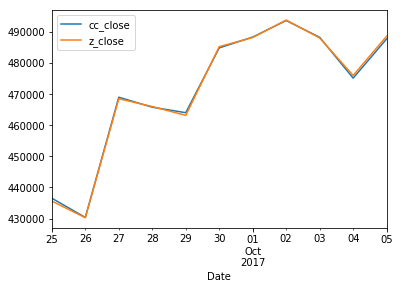

In [10]:
df.loc['2017-9-25':, ['cc_open', 'z_open']].plot.line();
df.loc['2017-9-25':, ['cc_close', 'z_close']].plot.line();

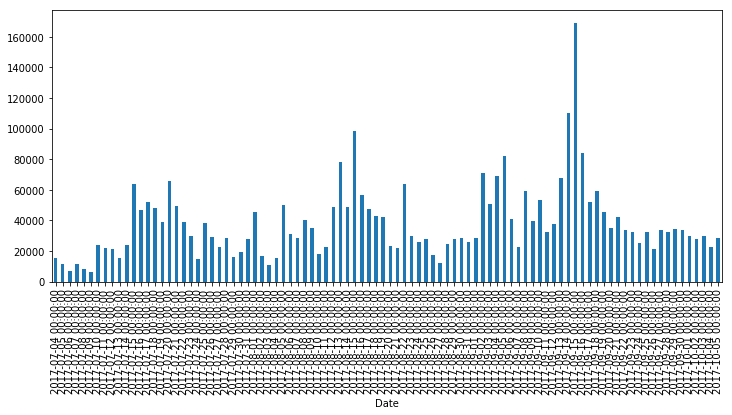

In [11]:
df['cc_volume (btc)'].plot.bar(figsize=(12,5));

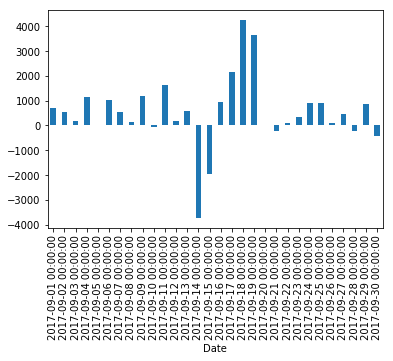

In [13]:
diff = df['cc_close'] - df['z_close']
diff.loc['2017-9'].plot.bar()